In [1]:
import pandas as pd

books = pd.read_csv(r'.\datasets\Books.csv', low_memory=False)
ratings = pd.read_csv(r'.\datasets\Ratings.csv', low_memory=False)

print(books.head())
print(ratings.head())


         ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/

In [2]:
print(books.info())

books.describe()
#ISBNs shown to be unique -> freq 1, missing 2 book authors, 25 book titles aren't unique

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
None


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271358,271360,271358,271360,271360,271357
unique,271360,242135,102022,118,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,17627,7535,2,2,2


In [3]:
books = books.drop(['Year-Of-Publication', 'Publisher','Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1)

print(books.head(1))

         ISBN           Book-Title         Book-Author
0  0195153448  Classical Mythology  Mark P. O. Morford


In [4]:
#capitalize ISBN, Book-Title, Book-Author
books['ISBN']=books['ISBN'].str.upper()
books['Book-Title']=books['Book-Title'].str.upper()
books['Book-Author']=books['Book-Author'].str.upper()

In [5]:
books[books['Book-Author'].isna()]

,ISBN,Book-Title,Book-Author
118033,0751352497,A+ QUIZ MASTERS:01 EARTH,NaN
187689,9627982032,THE CREDIT SUISSE GUIDE TO MANAGING YOUR PERSO...,NaN


In [6]:
books.loc[118033, 'Book-Author'] = "NONE"
books.loc[187689, 'Book-Author'] = 'LARISSA ANNE DOWNES'

books[books['Book-Author'].isna()]

,ISBN,Book-Title,Book-Author


In [7]:
books[books.duplicated()]

,ISBN,Book-Title,Book-Author
6635,002542730X,POLITICALLY CORRECT BEDTIME STORIES: MODERN TA...,JAMES FINN GARNER
11925,014062080X,THE SCARLET LETTER (PENGUIN POPULAR CLASSICS),NATHANIEL HAWTHORNE
16298,097089726X,JASPER,MICHELLE GROCE
19266,039592720X,INTERPRETER OF MALADIES,JHUMPA LAHIRI
22339,042512164X,CAPITAL CRIMES,LAWRENCE SANDERS
...,...,...,...
267020,088404632X,DIANETICS: THE MODERN SCIENCE OF MENTAL HEALTH,L. RON HUBBARD
269297,055215038X,THE SLEEPER,GILLIAN WHITE
269552,037376099X,PATIENT NURSE (MAN OF THE MONTH) (HARLEQUIN D...,DIANA PALMER
270285,189481505X,I-O,SIMON LOGAN


In [8]:
#remove duplicate rows, reset index
books.drop_duplicates(keep="first", inplace=True)
books.reset_index(drop=True,inplace=True)   

In [9]:
books[books.duplicated()]

,ISBN,Book-Title,Book-Author


In [10]:
print(ratings.head())
ratings.info()
#No null values

   User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0
3   276729  052165615X            3
4   276729  0521795028            6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [11]:
ratings[ratings.duplicated()].sum()
#no duplicates

User-ID        0
ISBN           0
Book-Rating    0
dtype: object

In [12]:
#create new dataset of ratings with matching ISBN in books
ratings['ISBN']=ratings['ISBN'].str.upper()
ratings_new = ratings[ratings['ISBN'].isin(books['ISBN'])]

In [13]:
print(ratings.shape)
print(ratings_new.shape)
#ratings_new has less entries, use this

(1149780, 3)
(1031136, 3)


In [14]:
ratings_new['Book-Rating'].value_counts().reset_index()
#most ratings are zero, probably implicit rating

,Book-Rating,count
0,0,647294
1,8,91804
2,10,71225
3,7,66402
4,9,60778
5,5,45355
6,6,31687
7,4,7617
8,3,5118
9,2,2375


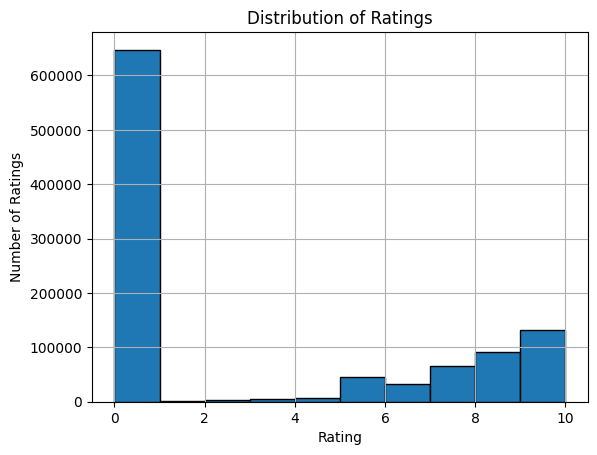

In [15]:
import matplotlib.pyplot as plt
#histogram of rating distribution

ratings_new['Book-Rating'].hist(bins=10, edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.show()

In [16]:
explicit = ratings_new[ratings_new['Book-Rating'] != 0]
implicit = ratings_new[ratings_new['Book-Rating'] == 0]
print(explicit.shape)
print(implicit.shape)
#keep explicit ratings

(383842, 3)
(647294, 3)


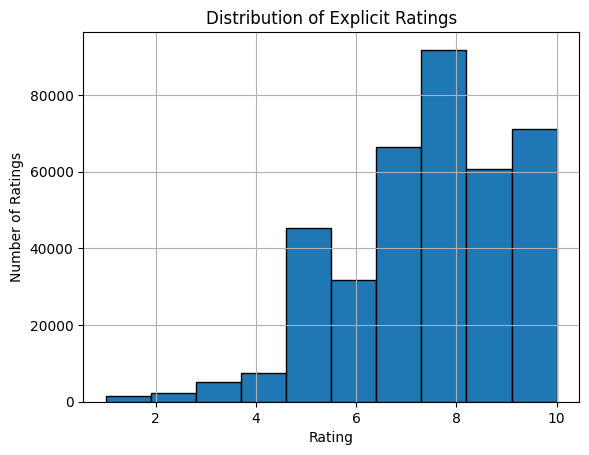

In [17]:
#histogram of explicit rating distribution
explicit['Book-Rating'].hist(bins=10, edgecolor='black')
plt.title('Distribution of Explicit Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.show()


In [18]:
#merge datasets
df = pd.merge(books, explicit, on='ISBN', how='inner')


In [19]:
print(df.shape)
print(df.head(3))
df.info()

(383892, 5)
         ISBN    Book-Title           Book-Author  User-ID  Book-Rating
0  0002005018  CLARA CALLAN  RICHARD BRUCE WRIGHT        8            5
1  0002005018  CLARA CALLAN  RICHARD BRUCE WRIGHT    11676            8
2  0002005018  CLARA CALLAN  RICHARD BRUCE WRIGHT    67544            8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383892 entries, 0 to 383891
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ISBN         383892 non-null  object
 1   Book-Title   383892 non-null  object
 2   Book-Author  383892 non-null  object
 3   User-ID      383892 non-null  int64 
 4   Book-Rating  383892 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 14.6+ MB


In [23]:
#check for duplicates of user-id and ISBN
duplicates = df[df.duplicated(subset=['User-ID', 'ISBN'], keep=False)]
duplicates.shape

(100, 5)

In [29]:
df_clean = df.drop_duplicates(subset=['User-ID', 'ISBN'])



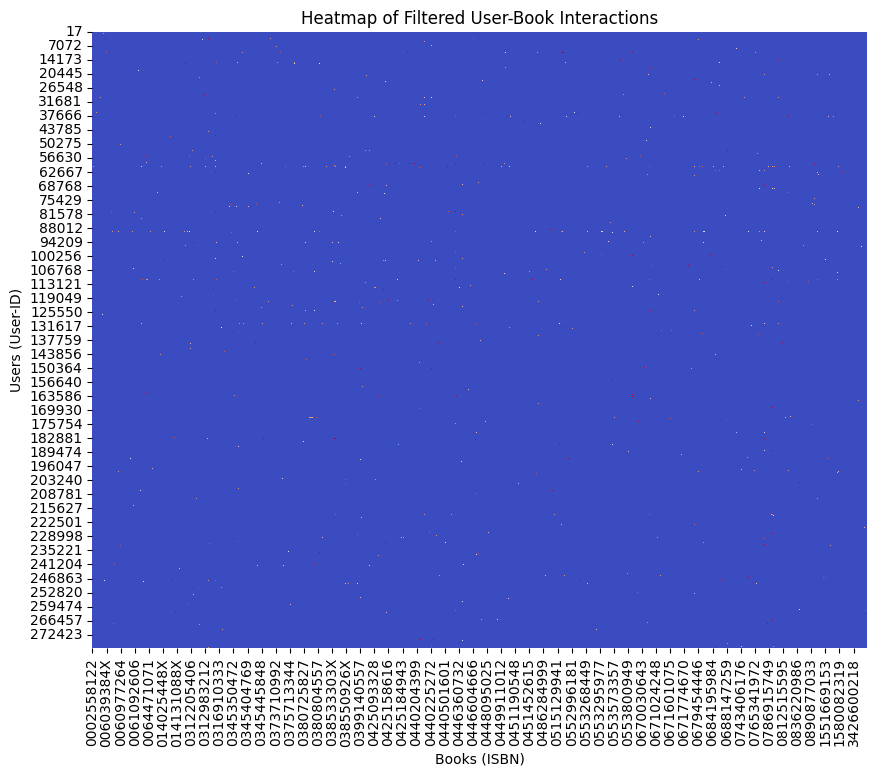

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter users who have rated at least 50 books
user_counts = df_clean['User-ID'].value_counts()
filtered_users = user_counts[user_counts >= 3].index

# Filter books that have at least 50 ratings
book_counts = df_clean['ISBN'].value_counts()
filtered_books = book_counts[book_counts >= 10].index

# Filter the original dataframe
df_filtered = df_clean[(df_clean['User-ID'].isin(filtered_users)) & (df_clean['ISBN'].isin(filtered_books))]

# Create a user-book matrix from the filtered data
user_book_matrix_filtered = df_filtered.pivot(index='User-ID', columns='ISBN', values='Book-Rating').fillna(0)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(user_book_matrix_filtered, cmap='coolwarm', cbar=False)
plt.title('Heatmap of Filtered User-Book Interactions')
plt.xlabel('Books (ISBN)')
plt.ylabel('Users (User-ID)')
plt.show()




In [18]:
#Prevent overwriting dataset
# df.to_csv('joined_dataset.csv', index=False)